In [1]:
# Connect Kernel to any notebook in "Textbook" #
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import os
from six.moves import urllib
from sklearn.model_selection import train_test_split
def plot_line(m,start,end,b=0):
    x = np.linspace(start,end,100)
    y = x * m + b
    plt.plot(x,y,"k--")
def plot_data_and_pc(data,pc,pos,center):
    plt.plot(data[:, 0], data[:, 1],'ro',)
    plt.plot(pc[:,0],pc[:,1],"rx")
    for i in range(m):
        plt.plot([data[:, 0][i],pc[:,0][i]],[data[:, 1][i],pc[:,1][i]],"b-")
    plt.legend(["original data(centered)","principle component","reconstruction error"],bbox_to_anchor=pos,loc=center,borderaxespad=1)
def save_fig(name):
    path = os.path.join("images","dimensionality_reduction",name+".png")
    plt.savefig(path)
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [2]:
# create and center data #
np.random.seed(42)
X = np.random.randint(1,10,(50,2)) # create data
m = X.shape[0]
n = X.shape[1]
print("X has %s instances(m) each with %s features(n)"%(m,n))
mean_of_data = X.mean(axis=0)
X_centered = X-mean_of_data # center data

X has 50 instances(m) each with 2 features(n)


In [3]:
## PCA by eigenvector ##
# calculate eigenvalue and eigenvector #
cov_matrix = np.dot(X_centered.T,X_centered)/(m-1) # covariance matrix
la,Vpca = np.linalg.eig(cov_matrix) #la = eigenvalue, v = matrix formed by eigenvector
print("Vpca,the metrix formed by eigenvector, is a %s * %s (n*n) metrix"%(Vpca.shape[0],Vpca.shape[1]))
# sort eigenvector with eigenvalue #
index = la.argsort()[::-1]
la_sorted = la[index]
Vpca_sorted = Vpca[:,index] #
W = Vpca_sorted[:,0:1] # use only the first principle component
print("W,the transforming metrix, is a %s * %s (n*k) vector because we decide to trim the dimension to %s"
      %(W.shape[0],W.shape[1],W.shape[1]))
print("W = %s"%(W))

Vpca,the metrix formed by eigenvector, is a 2 * 2 (n*n) metrix
W,the transforming metrix, is a 2 * 1 (n*k) vector because we decide to trim the dimension to 1
W = [[ 0.77480558]
 [-0.63219958]]


In [4]:
# transform #
X_reducted = np.dot(X_centered,W)
print("X_reducted,the data set after dimension is trimmed, is a %s * %s (m*k)vector"
      %(X_reducted.shape[0],X_reducted.shape[1]))
pc = X_reducted.dot(W.T)

X_reducted,the data set after dimension is trimmed, is a 50 * 1 (m*k)vector


<function matplotlib.pyplot.show(*args, **kw)>

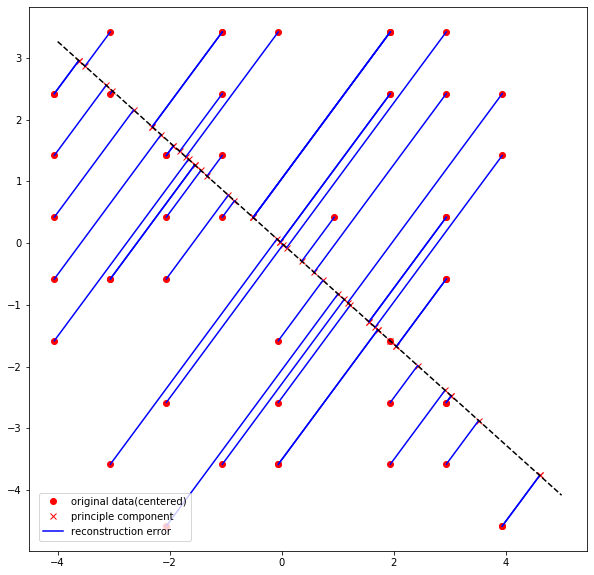

In [5]:
plt.figure(figsize=(10,10))
plot_data_and_pc(data=X_centered,pc=pc,pos=(0,0),center="lower left")
plot_line(m=W[1]/W[0],start=-4,end=5)
save_fig(name="pca")
plt.show

In [6]:
## PCA by sklearn ##
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_reducted1 = pca.fit_transform(X)
print("X_reducted1,the data set after dimension is trimmed, is a %s * %s (m*k)vector"
      %(X_reducted1.shape[0],X_reducted1.shape[1]))
# trasforming metrix and pc #
W1 = pca.components_.T # transforming metrix
print("W1,the transforming metrix here, is a %s * %s (n*k)vector"
      %(W1.shape[0],W1.shape[1]))
print("W1 = %s,which equals to W constructed by eigenvector"%(W1))
pc1 = X_reducted1.dot(W1.T) # principle component(1st)
print("pc1,the principle components here, is same as those acquired by eigenvector = pc")

X_reducted1,the data set after dimension is trimmed, is a 50 * 1 (m*k)vector
W1,the transforming metrix here, is a 2 * 1 (n*k)vector
W1 = [[ 0.77480558]
 [-0.63219958]],which equals to W constructed by eigenvector
pc1,the principle components here, is same as those acquired by eigenvector = pc


In [7]:
# variance ratio #
var_ratio = pca.explained_variance_ratio_
print("var_ratio computed by sklearn = %s"%(var_ratio[0]))
var_ratio_la = la_sorted[0]/la_sorted.sum()
print("var_ratio computed by summing and dividing eigenvalue also = %s"%(var_ratio_la))

var_ratio computed by sklearn = 0.5534142215622506
var_ratio computed by summing and dividing eigenvalue also = 0.5534142215622508


<function matplotlib.pyplot.show(*args, **kw)>

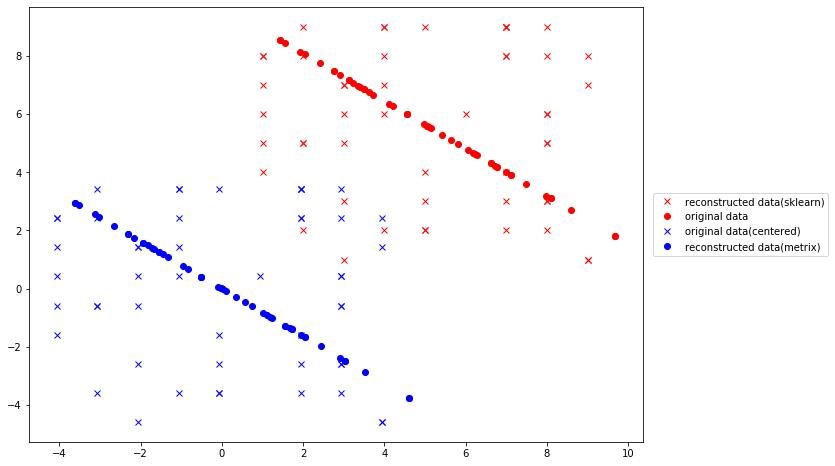

In [8]:
# reconstruction #
X_reconstructed1 = pca.inverse_transform(X_reducted1)
plt.figure(figsize=(11,8))
plt.plot(X[:,0],X[:,1],"rx")
plt.plot(X_reconstructed1[:,0],X_reconstructed1[:,1],"ro")
plt.plot(X_centered[:,0],X_centered[:,1],"bx")
plt.plot(pc1[:,0],pc1[:,1],"bo")
plt.legend(["reconstructed data(sklearn)","original data","original data(centered)","reconstructed data(metrix)"],
           bbox_to_anchor=(1,0.5),loc="center left",borderaxespad=1)
save_fig(name="data reconstruction")
plt.show

In [ ]:
## IPCA (tested by MNIST data)##
# import MNIST data #
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [ ]:
# split label/data, train_set/test_set #
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
m_mnist = X_train.shape[0]
n_mnist = X_train.shape[1]
print("X_train,the training data set here for MNIST data,is a %s*%s (m*n)metrix"
      %(m_mnist,n_mnist))

In [ ]:
# save data in disk #
# create a memory-mapped file X_mm to acess small segments of data without reading the entire .data file into memory #
filename = os.path.join("datasets","MNIST","mnist_for_CH8.dat")
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m_mnist, n_mnist))
X_mm[:] = X_train
del X_mm
X_mm_r = np.memmap(filename, dtype="float32", mode="readonly", shape=(m_mnist, n_mnist))

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
batch_size = m_mnist//n_batches
inc_pca = IncrementalPCA(n_components=154,batch_size=batch_size)
X_reduced = inc_pca.fit_transform(X_mm_r)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original",fontsize=20)
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.title("Reconstructed",fontsize=20)
plt.tight_layout()